In [3]:
%load_ext autoreload

In [180]:
%autoreload 2

# Churn Prediction Model Evaluation

## Load Libraries

In [183]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [185]:
import os
import sys
sys.path.append("../scripts/")  # Add the scripts folder to the path
import pandas as pd
from data_preprocessing import load_data, preprocess_data, split_data
from exploratory_data_analysis import plot_missing_values, plot_feature_distributions, plot_correlation_matrix, plot_outliers
from model_training import train_models
from evaluation import evaluate_model_comparison
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [186]:
data = load_data('../data/Churn_Modelling.csv')

In [187]:
# Check data types of all columns
print(data.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [188]:
# Get the number of unique values in each column
unique_counts = data.nunique()

# Display unique counts
print(unique_counts)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


## Exploratory Data Analysis

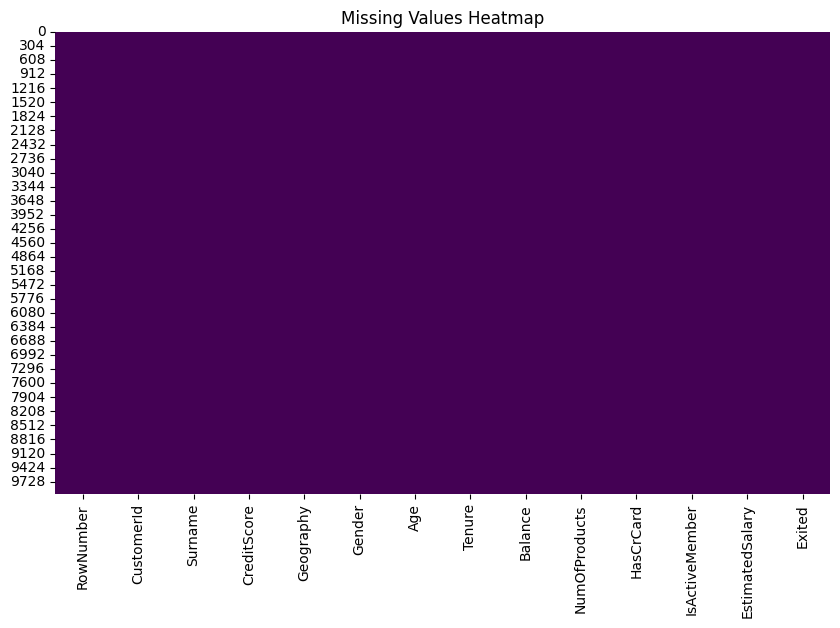

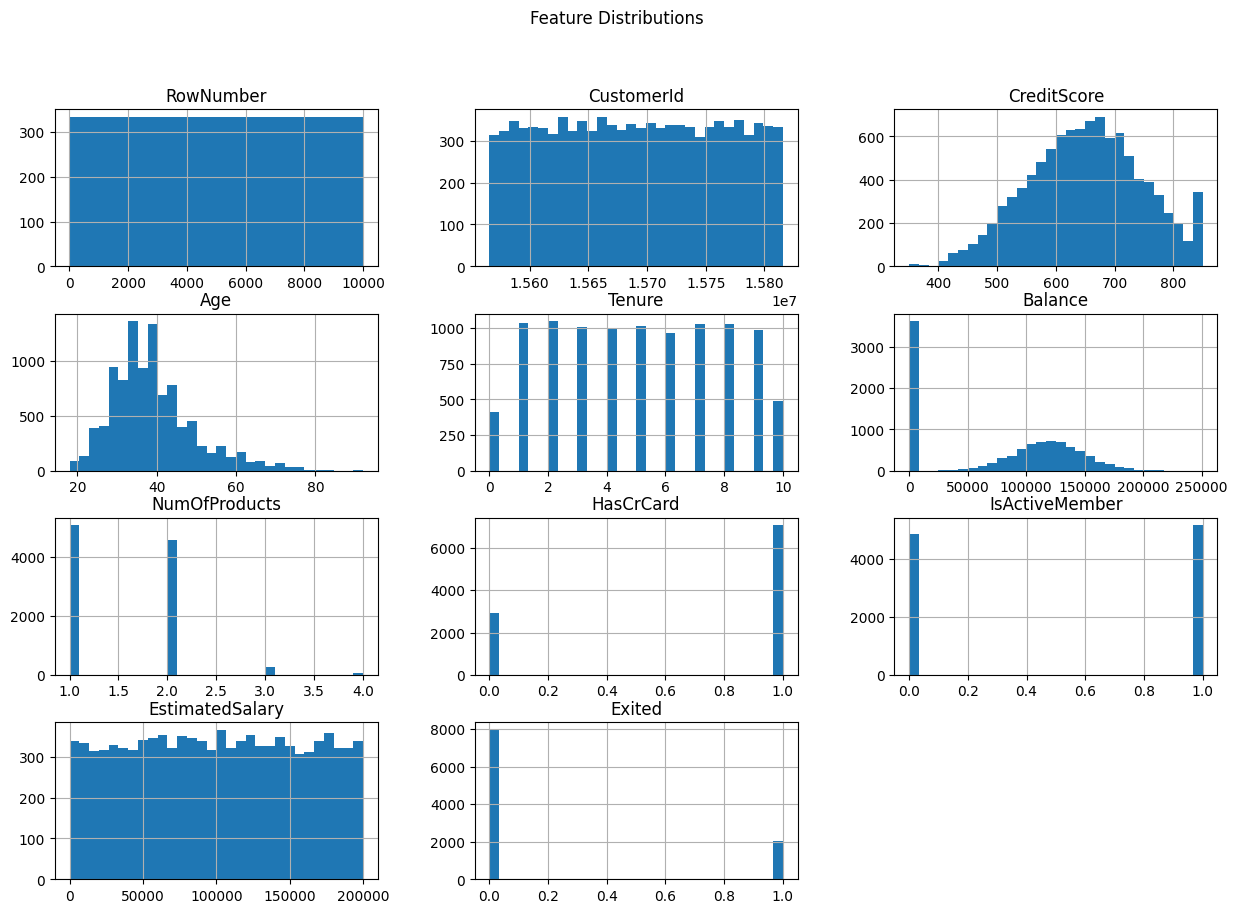

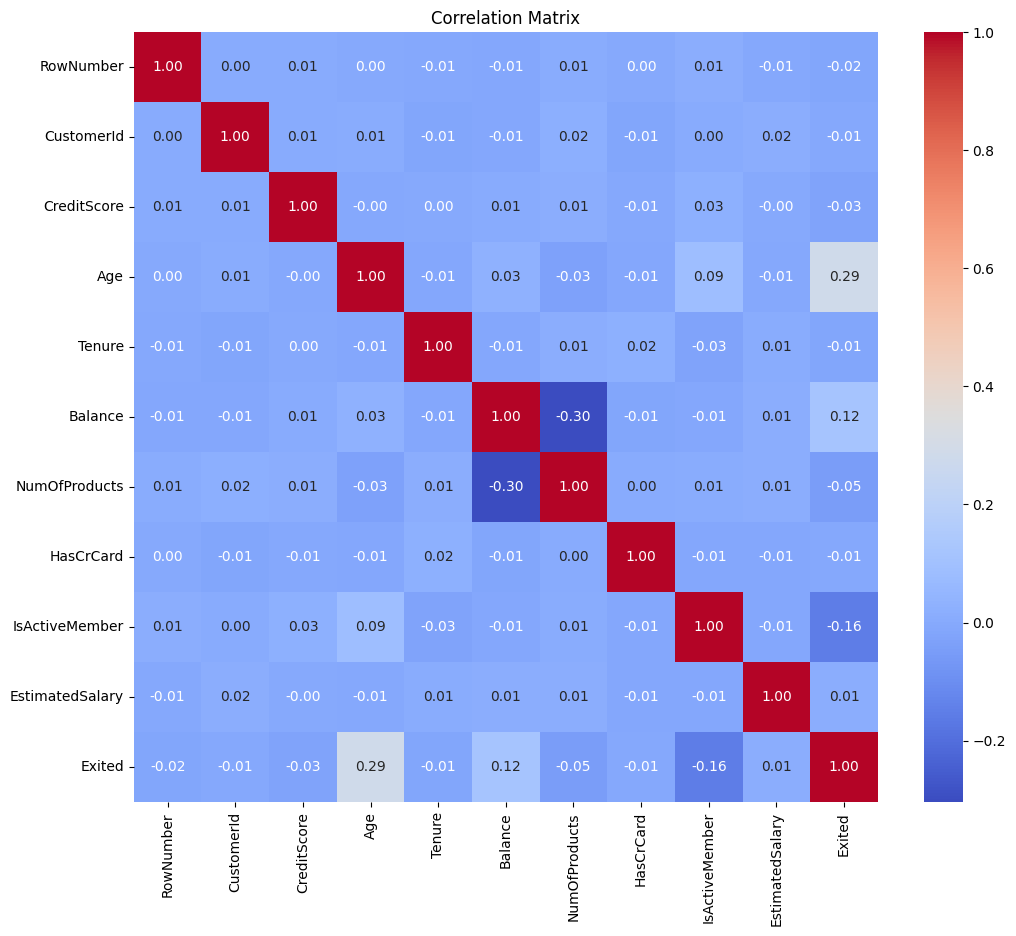

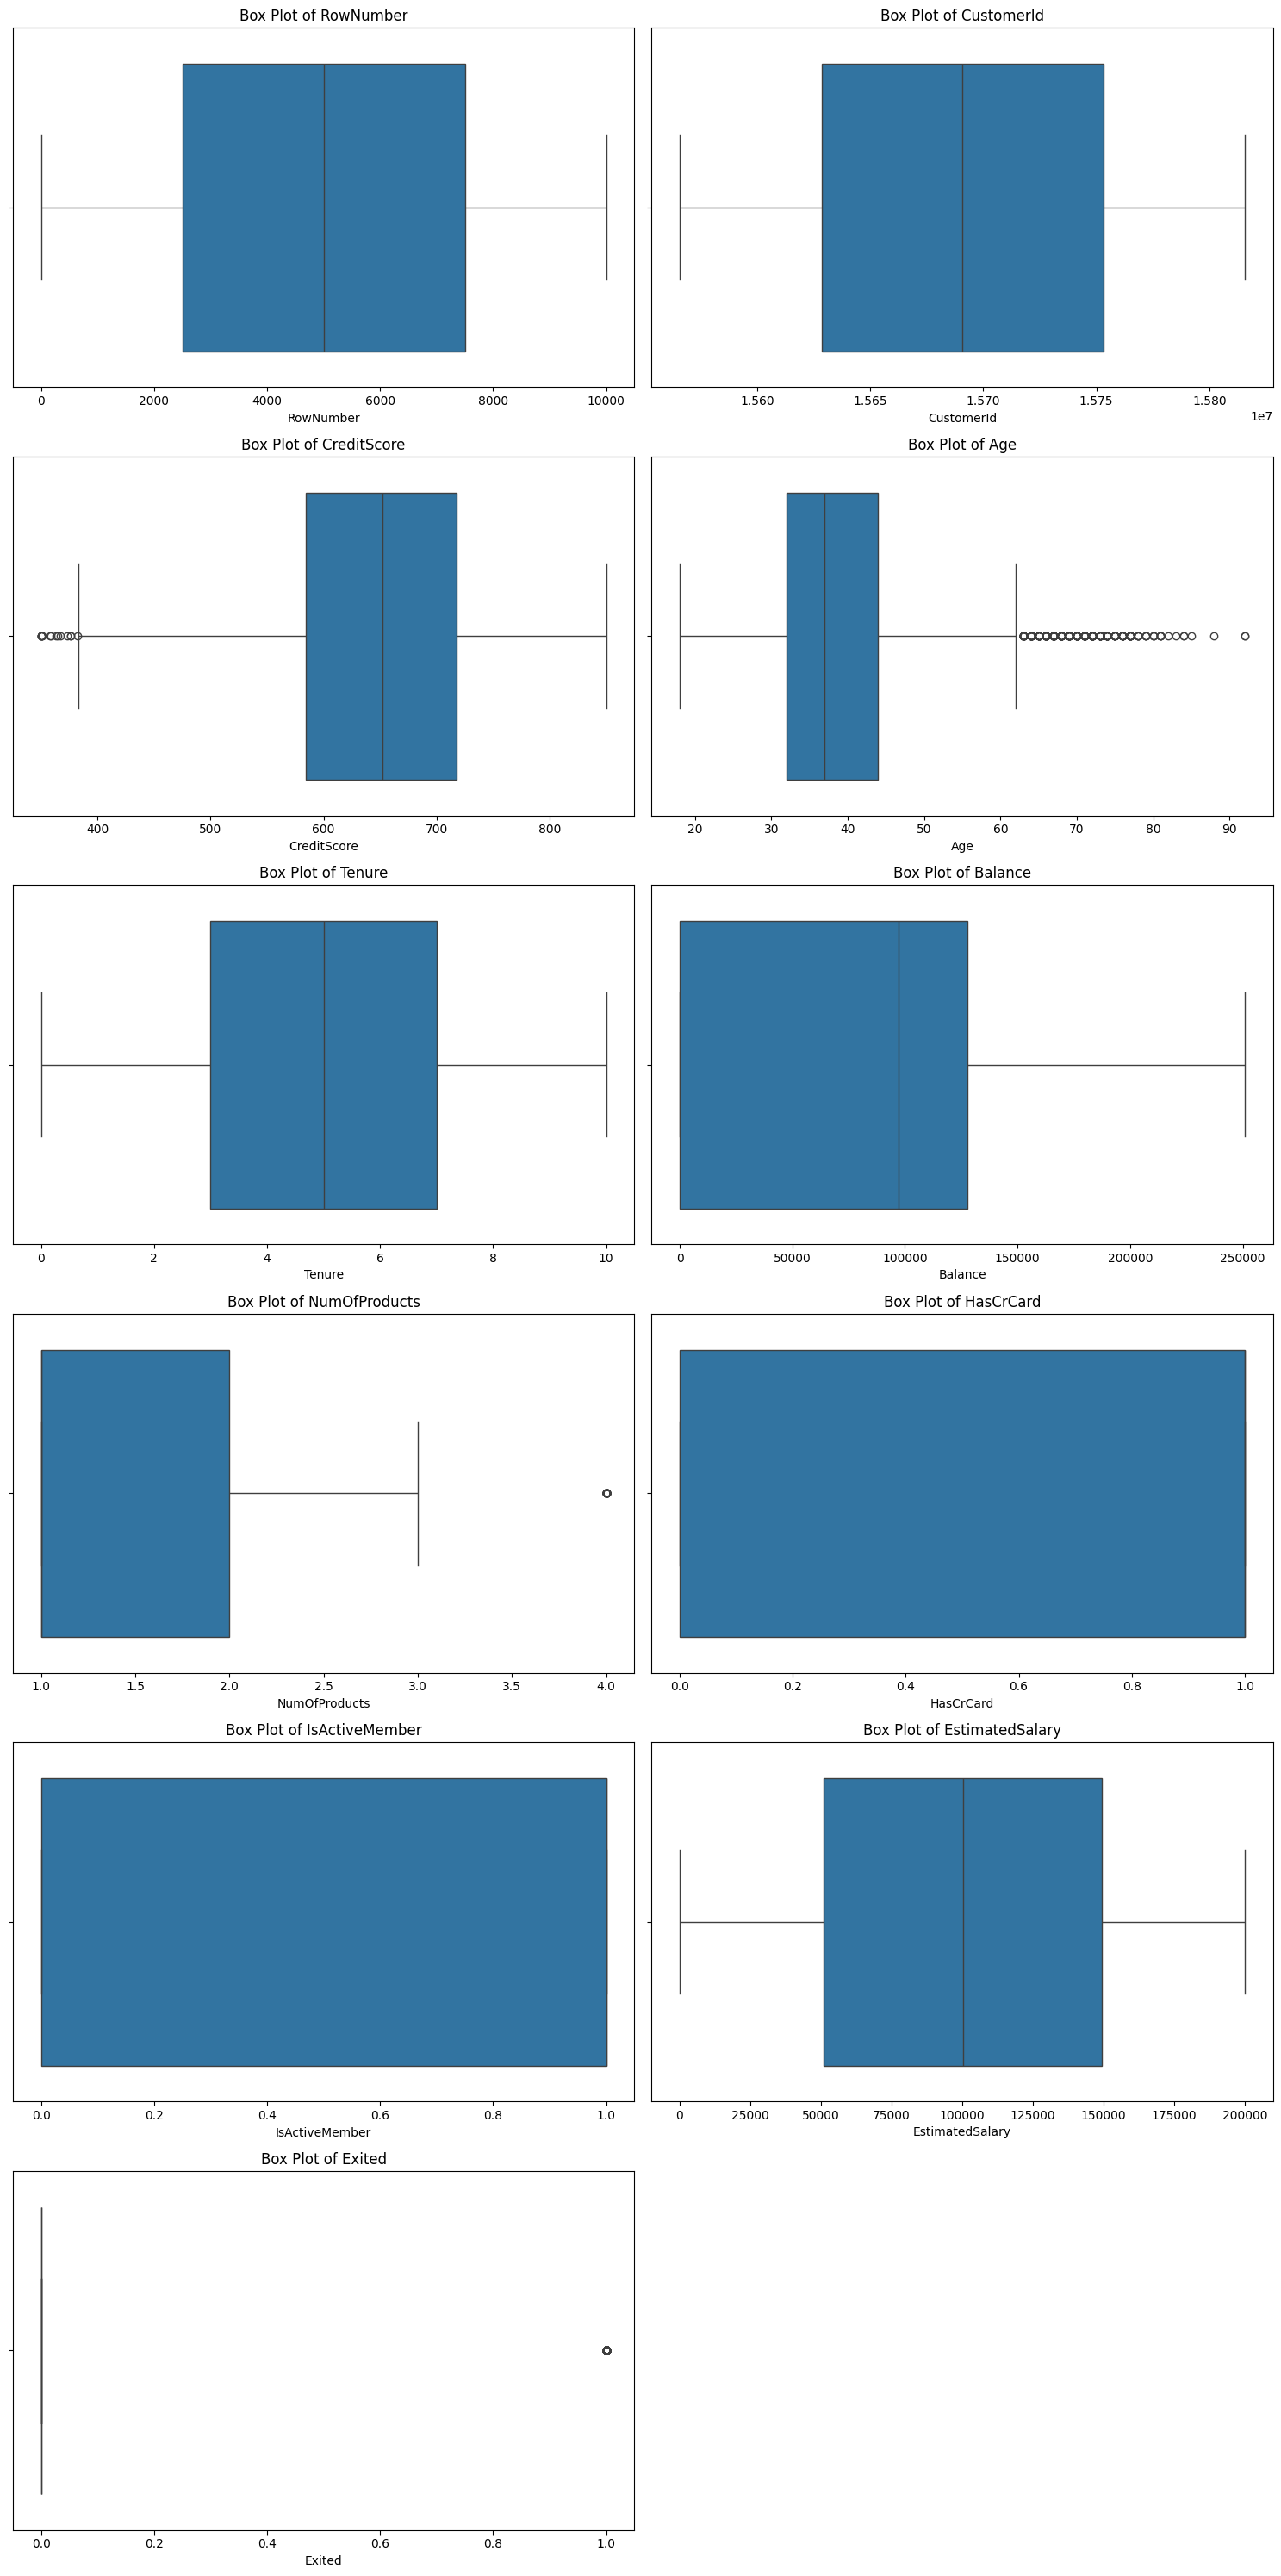

In [189]:
plot_missing_values(data)
plot_feature_distributions(data)
plot_correlation_matrix(data)
plot_outliers(data)

## Preprocess Data

In [140]:
X_processed, y = preprocess_data(data)

# Split the original data for train/test evaluation
X_original = data.drop('Exited', axis=1)
y_original = data['Exited']
X_train_original, X_test_original, y_train_original, y_test_original = split_data(X_original, y_original)



Class distribution before SMOTE:
Exited
0    7963
1    2037
Name: count, dtype: int64


In [141]:
# Check class distribution
print(y.value_counts())

Exited
0    7963
1    7963
Name: count, dtype: int64


In [142]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Train Models

In [181]:
#trained_models, cv_results = train_models(X_processed, y)

# Assuming you have the original DataFrame 'data' from which you processed 'X'
X_processed = pd.DataFrame(X_processed, columns=data.drop('Exited', axis=1).columns)

# Now call the train_models function
trained_models, cv_results = train_models(X_processed, y)

## Display Cross-Validation Results

In [182]:
print("Cross-Validation Results:")
for model_name, metrics in cv_results.items():
    print(f"{model_name}:")
    print(f"  CV F1 Mean: {metrics['cv_f1_mean']:.4f}")
    print(f"  CV Accuracy Mean: {metrics['cv_accuracy_mean']:.4f}")
    print(f"  CV Precision Mean: {metrics['cv_precision_mean']:.4f}")
    print(f"  CV Recall Mean: {metrics['cv_recall_mean']:.4f}")
    print()

Cross-Validation Results:
Logistic Regression:
  CV F1 Mean: 0.7210
  CV Accuracy Mean: 0.7211
  CV Precision Mean: 0.7180
  CV Recall Mean: 0.7251

Random Forest:
  CV F1 Mean: 0.7941
  CV Accuracy Mean: 0.7932
  CV Precision Mean: 0.7805
  CV Recall Mean: 0.8080

K-Nearest Neighbors:
  CV F1 Mean: 0.7586
  CV Accuracy Mean: 0.7483
  CV Precision Mean: 0.7262
  CV Recall Mean: 0.7954



## Evaluate Models

In [174]:
comparison_results = evaluate_model_comparison(X_processed, y, X_original, y_original)
print("Comparison Results:")
for model_name, metrics in comparison_results.items():
    print(f"{model_name}:")
    print(f"  CV F1 Mean: {metrics['cv_f1_mean']:.4f}")
    print(f"  CV Accuracy Mean: {metrics['cv_accuracy_mean']:.4f}")
    print(f"  CV Precision Mean: {metrics['cv_precision_mean']:.4f}")
    print(f"  CV Recall Mean: {metrics['cv_recall_mean']:.4f}")
    print(f"  Train/Test F1: {metrics['tt_f1']:.4f}")
    print(f"  Train/Test Accuracy: {metrics['tt_accuracy']:.4f}")
    print(f"  Train/Test Precision: {metrics['tt_precision']:.4f}")
    print(f"  Train/Test Recall: {metrics['tt_recall']:.4f}")
    print()





Comparison Results:
Logistic Regression:
  CV F1 Mean: 0.7211
  CV Accuracy Mean: 0.7212
  CV Precision Mean: 0.7180
  CV Recall Mean: 0.7252
  Train/Test F1: 0.4677
  Train/Test Accuracy: 0.8395
  Train/Test Precision: 0.6714
  Train/Test Recall: 0.3588

Random Forest:
  CV F1 Mean: 0.7926
  CV Accuracy Mean: 0.7946
  CV Precision Mean: 0.7834
  CV Recall Mean: 0.8067
  Train/Test F1: 0.5860
  Train/Test Accuracy: 0.8665
  Train/Test Precision: 0.7500
  Train/Test Recall: 0.4809

K-Nearest Neighbors:
  CV F1 Mean: 0.7077
  CV Accuracy Mean: 0.6844
  CV Precision Mean: 0.6590
  CV Recall Mean: 0.7644
  Train/Test F1: 0.1355
  Train/Test Accuracy: 0.7640
  Train/Test Precision: 0.2418
  Train/Test Recall: 0.0941



## Visualization

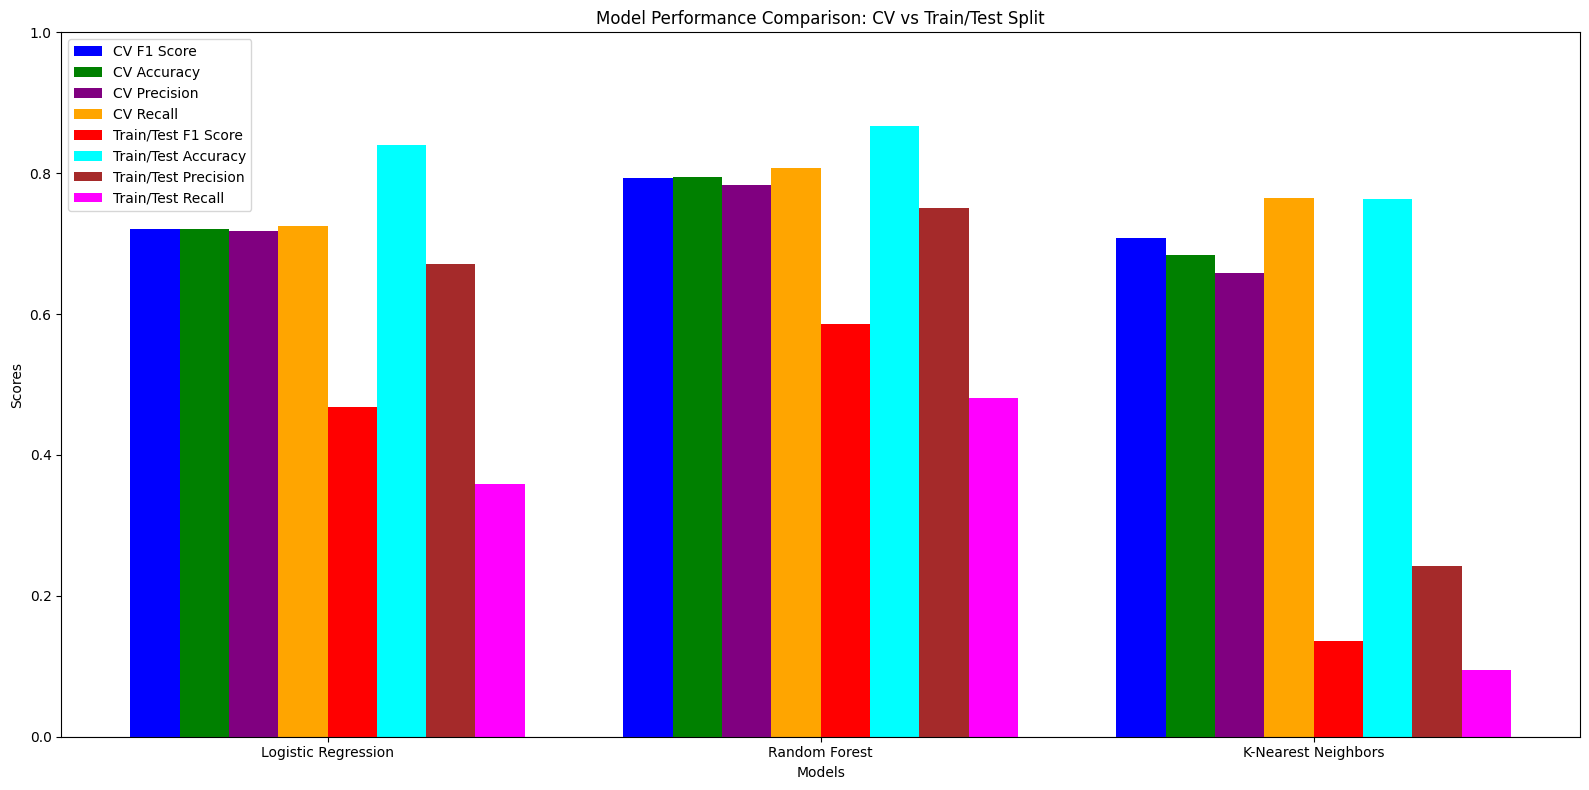

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to include
metrics = ['CV F1 Score', 'CV Accuracy', 'CV Precision', 'CV Recall',
           'Train/Test F1 Score', 'Train/Test Accuracy', 
           'Train/Test Precision', 'Train/Test Recall']
model_names = list(comparison_results.keys())

# Extract scores
cv_f1_scores = [comparison_results[model]['cv_f1_mean'] for model in model_names]
cv_accuracy_scores = [comparison_results[model]['cv_accuracy_mean'] for model in model_names]
cv_precision_scores = [comparison_results[model]['cv_precision_mean'] for model in model_names]
cv_recall_scores = [comparison_results[model]['cv_recall_mean'] for model in model_names]
tt_f1_scores = [comparison_results[model]['tt_f1'] for model in model_names]
tt_accuracy_scores = [comparison_results[model]['tt_accuracy'] for model in model_names]
tt_precision_scores = [comparison_results[model]['tt_precision'] for model in model_names]
tt_recall_scores = [comparison_results[model]['tt_recall'] for model in model_names]

# Set bar width and positions
bar_width = 0.1
x = np.arange(len(model_names))

# Create the figure
plt.figure(figsize=(16, 8))

# Plot each metric
plt.bar(x - bar_width*3.5, cv_f1_scores, width=bar_width, label='CV F1 Score', color='blue')
plt.bar(x - bar_width*2.5, cv_accuracy_scores, width=bar_width, label='CV Accuracy', color='green')
plt.bar(x - bar_width*1.5, cv_precision_scores, width=bar_width, label='CV Precision', color='purple')
plt.bar(x - bar_width/2, cv_recall_scores, width=bar_width, label='CV Recall', color='orange')
plt.bar(x + bar_width/2, tt_f1_scores, width=bar_width, label='Train/Test F1 Score', color='red')
plt.bar(x + bar_width*1.5, tt_accuracy_scores, width=bar_width, label='Train/Test Accuracy', color='cyan')
plt.bar(x + bar_width*2.5, tt_precision_scores, width=bar_width, label='Train/Test Precision', color='brown')
plt.bar(x + bar_width*3.5, tt_recall_scores, width=bar_width, label='Train/Test Recall', color='magenta')

# Labeling the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison: CV vs Train/Test Split')
plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.axhline(0, color='grey', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()